<a href="https://colab.research.google.com/github/dgromann/SemComp_WS2018/blob/master/Tutorial3/Tutorial3_model_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lesson 0.0.0: Store this notebook! 

Go to "File" and make sure you store this file as a local copy to either GitHub or your Google Drive. If you do not have a Google account and also do not want to create one, please check Option C below. 

Option A) Google Drive WITH collaboration

If you want to work in a collaborative manner where each of you in the group can see each other's contributions, one of you needs to store the notebook in Google Drive and share it with the others. You share it by clicking on the SHARE button on the top right of this page and share the link with the "everyone who receives this link can edit" option with the other team members per e-mail, skype, or any other way you prefer.

If you work with others, keep in mind to always copy the code before you edit it and always indicate your name as a comment (e.g. #Dagmar ) in the cell that it is clear who wrote which part. I also recommend creating a new code cell for your contributions.


Option B) Github without collaboration

Collaborative functions are not available when storing the notebook in GitHub; you will see your own work but not that of others.


Option C) Download this notebook as ipynb (Jupyter notebook) or py (Python file)

To run either of these on your local machine requires the installation of the required programs, which for the first tutorial are Python and NLTK. This will become more as we continue on to machine learning (requiring sklearn) and deep learning (requiring tensorflow and/or pytorch). In Google Codelab all of these are provided and do not need to be installed locally.


# Lesson 1: Let's go over a Naive Bayes example

Different types of Naive Bayes in sklearn: 

*   Bernoulli Naive Bayes : for binary classification tasks; assigns 0 (word does not occur in document) or 1 (word does occur in document)
* Multinomial Naive Bayes: for discrete variables (e.g. movie ratings or several topics) where we have the count of each word to predict the class or label 
* Gaussian Naive Bayes: assumes a normal distribution and used for continuous variables, that is our features are continuous (e.g. sepal width, petal width, etc. of a flower) 



In [0]:
# Most imports for Lesson 1, 2 and 3 - some additional ones below
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

import numpy as np

The following cell provides all processing steps from preprocessing the text (in this case no special preprocessing is required)
to training a Multinomial Naive Bayes classifier. 

In [0]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

print("The categories of this classification dataset are: ", twenty_train.target_names)
print("The number of documents in this repository is: ", len(twenty_train.filenames), "which is equivalent to ", len(twenty_train.data))

# Tokenizing the text 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print("Training data after CountVectorizer: ", X_train_counts.shape)

# Convert occurrences to frequencies
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print("Training data after TF-IDF: ", X_train_tfidf.shape)

# Let's initialize the classifier and fit the model to the training data
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

# Prepare test data
X_test_counts = count_vect.transform(twenty_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print("Test data after TF-IDF: ", X_test_tfidf.shape)

# Get prediction over test data
predicted = clf.predict(X_test_tfidf)
print("Accuracy is: ", np.mean(predicted == twenty_test.target))
print("Alternative way to calculate accuracy: ", accuracy_score(twenty_test.target, predicted))


The categories of this classification dataset are:  ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
The number of documents in this repository is:  2257 which is equivalent to  2257
Training data after CountVectorizer:  (2257, 35788)
Training data after TF-IDF:  (2257, 35788)
Test data after TF-IDF:  (1502, 35788)
Accuracy is:  0.8348868175765646
Alternative way to calculate accuracy:  0.8348868175765646


This cell allows you to make predictions on your own sentences using the trained model .

In [0]:
# Exercise: classify your own sentences with the trained model 
# Study the code above in detail to understand what you need to do 
# before you can ask the model to predict a label for your sentence(s).
# Two example sentences are provided below.
docs_new = ['Test this', 'OpenGL on the GPU is fast']

docs_new_counts = count_vect.transform(docs_new)
tfidf_transformer.transform(docs_new_counts)

predicted = clf.predict(docs_new_counts)

for doc, category in zip(docs_new, predicted):
  print('%r => %s' % (doc, twenty_train.target_names[category]))

'Test this' => sci.med
'OpenGL on the GPU is fast' => soc.religion.christian


All of the above processing steps can be simplified to a pipeline that applies all steps to each input.

In [0]:
# Exercise: Apply the following pipeline to classifying

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

text_clf.fit(twenty_train.data, twenty_train.target) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# Lesson 2: Sentiment analysis with Naive Bayes on tweets including  preprocessing

This task first asks you to clean the provided tweets. The set is a subset of a 2017 challenge on sentiment analysis 
at SemEval. After preprocessing, see what kind of accuracy you can get with your algorithm and whether more preprocessing
might be useful. You can also first just run the algorithm without preprocessing and then see whether and how it improves when certain items are removed.. 

In [0]:
!pip install wordcloud
# Some additional imports for Lesson 2
from google.colab import files
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

import re 
import string

# load the text file from the github Tutorial 3 folder
files.upload()

The wordcloud method below is only for visualizing the content of the tweets in a cloud of words to see which ones are predominant in this dataset. 

None


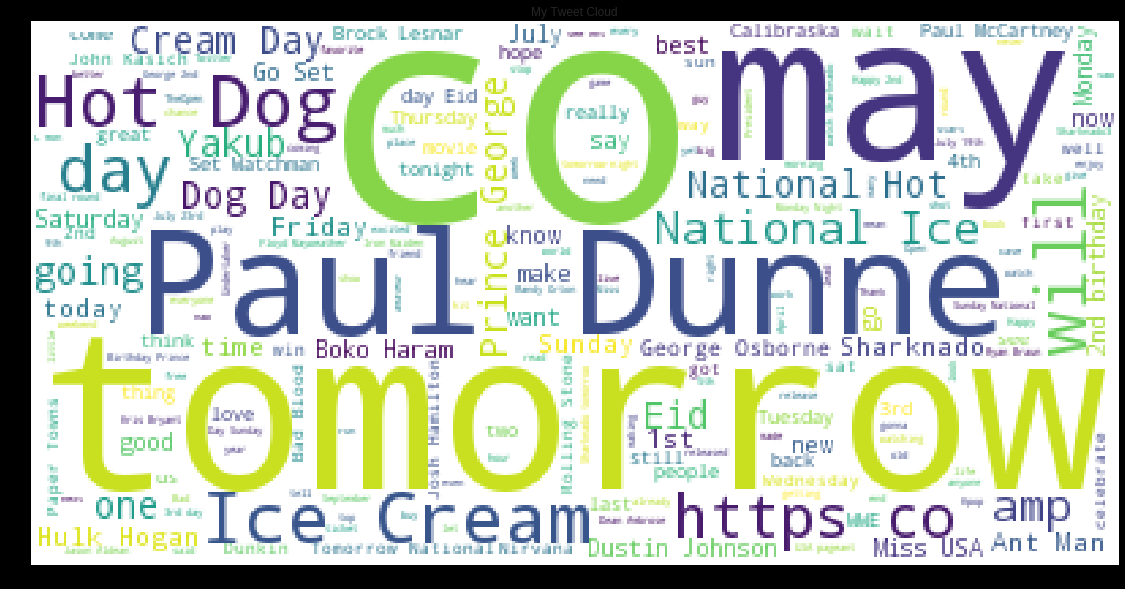

In [0]:
# Exercise: clean the tweets, that is, take a look at the tweets and 
# think of reasonable preprocessing steps for sentiment classification.
# After you have preprocessed the tweets, use append() to add the cleaned 
# data to the variable data[] and append all the sentiment labels to the 
# variable labels[]

# Method for visualizing tweets in a word cloud if you want
def wordcloud(data):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in data]))
  plt.figure( figsize=(20,10), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("My Tweet Cloud")

file = open("SemEval2017_task4_subset.txt", "r")

# For punctuation removal
punctuation = list(string.punctuation)

data = []
labels = []

for line in file:
  tweet = line.split("\t")[2]
  # You could alternatively delete all of the below with one regular expression
  # For practicing purposes and to have a less dense representation, I provide 
  # them individually here
  
  # Remove double quotation marks 
  tweet = tweet.replace("\"", "\'", 10)
  # Remove all single quotation marks at the beginning and end of tweet
  tweet = tweet.strip("\'")
   
  # For this subset of the SemEval data we really get a higher accuraccy without 
  # removing urls, punctuation, and users so the code below is outcommented
  # Replace all urls by "url"
  #tweet = re.sub(r"http\S+", "url", tweet)
  # Replace all users by "user
  #tweet = re.sub(r"@\S+", "user", tweet)
  # Remove hashtags 
  #tweet = re.sub(r"#\S+", "user", tweet)
  
  # Remove some additional punctuation 
  #tweet = re.sub(r"[^\w\s]", "", tweet)
  
  data.append(tweet)
  labels.append(line.split("\t")[1])

print(wordcloud(data))

In [0]:
# Exercise: Once you are done with preprocessing and your data and labels 
# are stored, run an NB classifier on the tweets 

# This is how the data is split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print("Alternative way to calculate accuracy: ", accuracy_score(y_test, predicted))


# If you want to print some of the predictions to have a look 
for i in range(0,10):  
  print(y_test[i], predicted[i], X_test[i])

  
# Exercie: How could we obtain the split into training, test, and 
# development set?
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2)

text_clf.fit(X_train, y_train)
predicted_dev = text_clf.predict(X_dev)
print()
print("Accuracy on training and development set: ", accuracy_score(y_dev, predicted_dev))


Alternative way to calculate accuracy:  0.6416666666666667
positive positive Today is National Hot Dog Day. I feel that since it is also two-slice Thursday, @VinnysPizza594 should've had a chili cheese hot dog pizza.
neutral neutral Imagine thinking Hulk Hogan is rting all these tweets, the people who run his account who are doing it, hes prob at a kkk march or something
neutral neutral Wouldn't be shocked if Hulk Hogan returned to WWE for a 5th time, if the smoke clears between him and WWE. Vince, how long will it go?
positive positive Also, Sharknado 3 tomorrow! Bring on the campy shark and theme park humor!
neutral neutral @MarcherLord1 No, but you missed the Eid event in Trafalgar Square on Saturday.
neutral positive I'm already going to see Paper Towns tomorrow, so someone take me on a date to see Southpaw some other time.
positive positive I may not be Miss USA but I am still Miss Minnesota USA! I am looking forward to the appearances I have coming up!! user
negative neutral Saud

# Lesson 3: Cross-validation

K-fold cross-validation iteratively tests on different partitions of the data to avoid overfitting.

In [0]:
from sklearn.model_selection import KFold
twenty = fetch_20newsgroups(categories=categories, shuffle=True, random_state=42)

# Exercise: Try to get the following k-fold cross validation to run on 
# our trainng data for practising.
# how does this change the accuracy?
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty.data)

# Convert occurrences to frequencies
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
y_train_input = twenty.target

kf = KFold(n_splits=2, shuffle=False) # number of splits you would like to obtain 
clf = MultinomialNB()

i = 0
for train_index, test_index in kf.split(X_train_tfidf):
  i += 1
  X_train, X_test = X_train_tfidf[train_index], X_train_tfidf[test_index]
  y_train, y_test = y_train_input[train_index], y_train_input[test_index]
  clf.fit(X_train, y_train)
  print("Accuraccy of %s run: " % i , accuracy_score(clf.predict(X_test), y_test))



Accuraccy of 1 run:  0.8644818423383526
Accuraccy of 2 run:  0.8581560283687943


# Bonus: Evaluate the effect of hashtags on tweets 

In [0]:
# Exercise: collect all the hashtags from tweets with the label of the respective 
# tweet, that is, hashtags coming from a positive tweet have a positive label
# and then get the ten most frequent ones for each category. Which one is 
# predominant? Which one is the most frequent hashtag across all categories?
# Does this observation take effect when training with or without hashtags?

hashtags = []
hash_labels = []
hashcounts = {}

for index in range(0, len(data)):
  for w in re.findall(r"#(\w+)", data[index]):
    if w in hashcounts.keys(): 
      hashcounts[w] += 1
    else: 
      hashcounts[w] = 1

    hashtags.append(w)
    hash_labels.append(labels[index])

sorted_ed = sorted(hashcounts.items(), key=lambda x: x[1], reverse=True)

for key, value in sorted_ed[:10]: 
  print("Hashtag: ", key, ", Frequency: ", value, ", Sentiment Label: ", hash_labels[hashtags.index(key)])

Hashtag:  TheOpen , Frequency:  43 , Sentiment Label:  neutral
Hashtag:  TheOpen2015 , Frequency:  28 , Sentiment Label:  neutral
Hashtag:  Sharknado3 , Frequency:  28 , Sentiment Label:  positive
Hashtag:  CalibraskaEP , Frequency:  18 , Sentiment Label:  positive
Hashtag:  RAW , Frequency:  17 , Sentiment Label:  neutral
Hashtag:  AprilLives , Frequency:  16 , Sentiment Label:  positive
Hashtag:  1 , Frequency:  14 , Sentiment Label:  neutral
Hashtag:  WWE , Frequency:  12 , Sentiment Label:  positive
Hashtag:  Brewers , Frequency:  10 , Sentiment Label:  neutral
Hashtag:  MLB , Frequency:  9 , Sentiment Label:  neutral
